### CSCN8030 : AI for Business Decision
#### Global food production distribution analysis and optimization

##### Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and clean dataset

In [8]:

crop_df = pd.read_csv(".\\data\\crop1.csv")
live_df = pd.read_csv(".\\data\\live1.csv")

##### Check Null data and clean data

In [15]:
corp_nulls = crop_df.isnull().sum()
print("-------------------")
print("Corp.csv")
print("-------------------")
print(corp_nulls)
live_nulls = live_df.isnull().sum()
print("-------------------")
print("\nLive.csv")
print("-------------------")
print(live_nulls)


-------------------
Corp.csv
-------------------
Area            0
Item            0
Element         0
Year            0
Unit            0
Value      129500
dtype: int64
-------------------

Live.csv
-------------------
Area          0
Item          0
Element       0
Year          0
Unit          0
Value      2264
dtype: int64


##### Filter clean data

In [16]:
crop_df_cleaned = crop_df[crop_df['Value'].notnull() & (crop_df['Value'] > 0)]
live_df_cleaned = live_df[live_df['Value'].notnull() & (live_df['Value'] > 0)]

##### Validate clean dataset

In [28]:
# Check for any remaining missing values
print("Missing values after cleaning:")
print(crop_df_cleaned.isnull().sum())
print(live_df_cleaned.isnull().sum())

Missing values after cleaning:
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64


#### Exploratory Data Analysis

##### Identify corps which produced most ( worldwide )

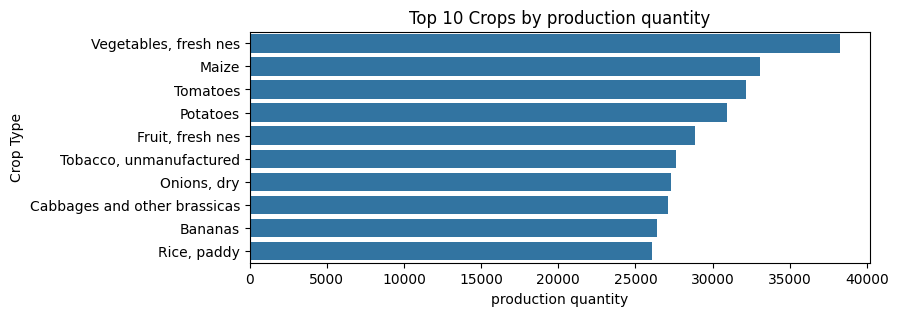

In [19]:

# Top crops
top_crops = crop_df_cleaned['Item'].value_counts().head(10)
crop_trend = crop_df_cleaned.groupby('Year')['Value'].sum() # Trend of crop production over the years

plt.figure(figsize=(8, 3)) # Top crops by frequency
sns.barplot(x=top_crops.values, y=top_crops.index)
plt.title("Top 10 Crops by production quantity")
plt.xlabel("production quantity")
plt.ylabel("Crop Type")
plt.show()

##### Identify livestock which produced most ( worldwide )

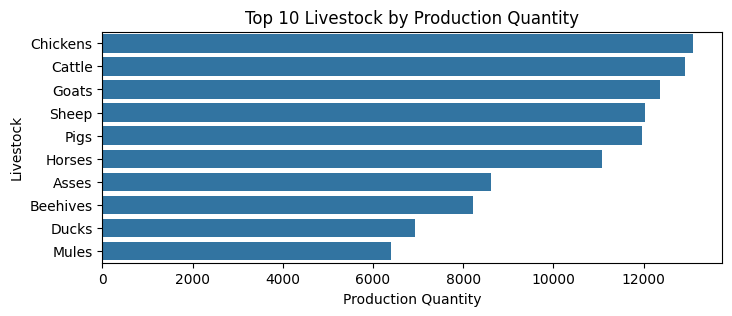

In [22]:
# Top livestock
top_livestock = live_df_cleaned['Item'].value_counts().head(10)
livestock_trend = live_df_cleaned.groupby('Year')['Value'].sum() # Trend of livestock stocks over the years

plt.figure(figsize=(8, 3)) # Top livestock by frequency
sns.barplot(x=top_livestock.values, y=top_livestock.index)
plt.title("Top 10 Livestock by Production Quantity")
plt.xlabel("Production Quantity")
plt.ylabel("Livestock")
plt.show()

##### Understand Production trend with time : corps

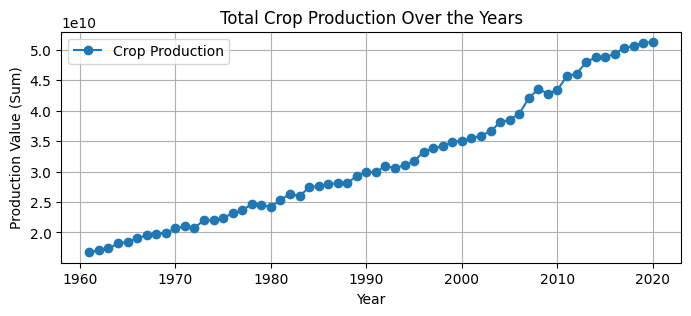

In [24]:
# Crop production trend over the years
plt.figure(figsize=(8, 3)) 
plt.plot(crop_trend.index, crop_trend.values, marker='o', label="Crop Production")
plt.title("Total Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Production Value (Sum)")
plt.legend()
plt.grid()
plt.show()

##### Understand Production trend with time : livestock

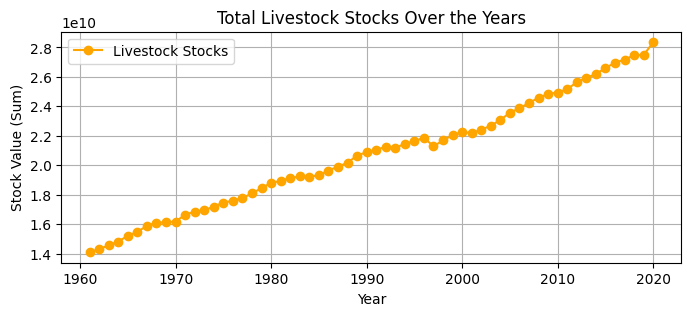

In [27]:
plt.figure(figsize=(8, 3)) # Livestock stock trend over the years
plt.plot(livestock_trend.index, livestock_trend.values, marker='o', color='orange', label="Livestock Stocks")
plt.title("Total Livestock Stocks Over the Years")
plt.xlabel("Year")
plt.ylabel("Stock Value (Sum)")
plt.legend()
plt.grid()
plt.show()

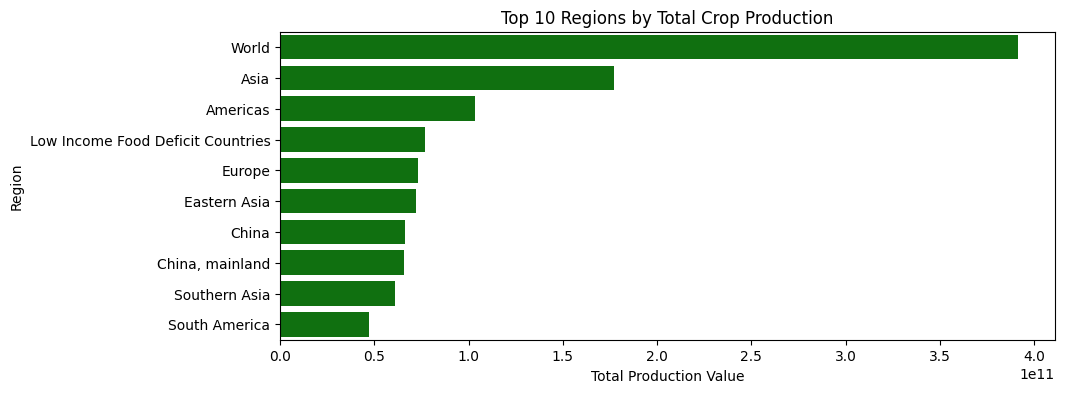

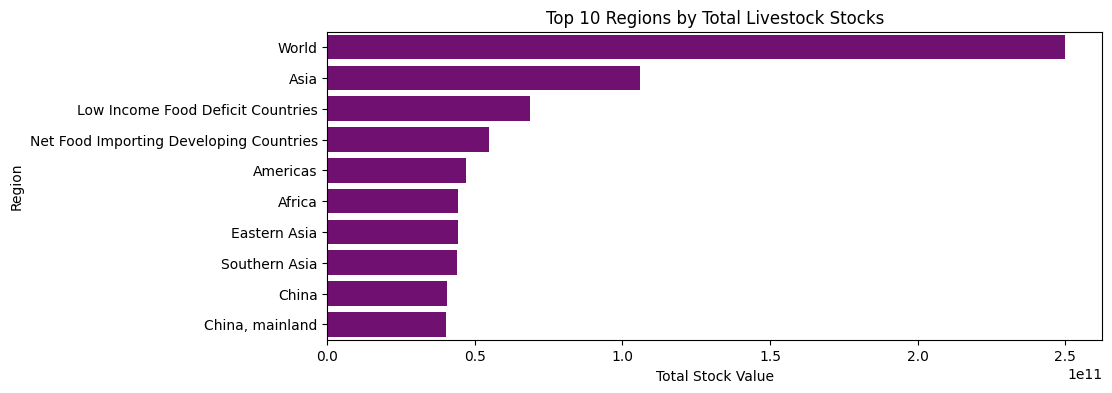

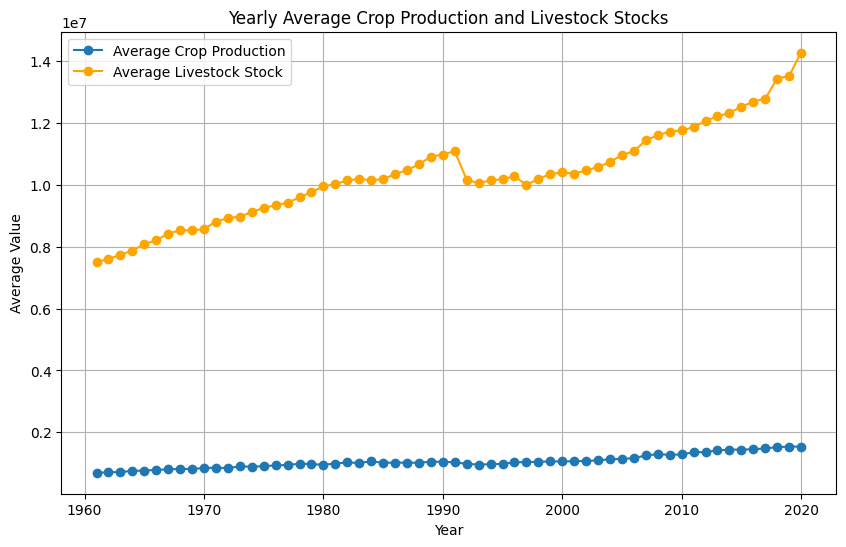

In [4]:
top_regions_crop = crop_df_cleaned.groupby('Area')['Value'].sum().nlargest(10) # Regional comparison for top 10 regions by crop production
plt.figure(figsize=(10, 4))
sns.barplot(x=top_regions_crop.values, y=top_regions_crop.index, color ="green")
plt.title("Top 10 Regions by Total Crop Production")
plt.xlabel("Total Production Value")
plt.ylabel("Region")
plt.show()

top_regions_livestock = live_df_cleaned.groupby('Area')['Value'].sum().nlargest(10) # Regional comparison for top 10 regions by livestock stocks
plt.figure(figsize=(10, 4))
sns.barplot(x=top_regions_livestock.values, y=top_regions_livestock.index, color ="purple")
plt.title("Top 10 Regions by Total Livestock Stocks")
plt.xlabel("Total Stock Value")
plt.ylabel("Region")
plt.show()

# Yearly average production and stock values
yearly_avg_crop = crop_df_cleaned.groupby('Year')['Value'].mean()
yearly_avg_livestock = live_df_cleaned.groupby('Year')['Value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_crop.index, yearly_avg_crop.values, label="Average Crop Production", marker='o')
plt.plot(yearly_avg_livestock.index, yearly_avg_livestock.values, label="Average Livestock Stock", marker='o', color='orange')
plt.title("Yearly Average Crop Production and Livestock Stocks")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()

# # Heatmap for correlation in crop data (numerical features only)
# numeric_cols_crop = crop_df_cleaned.select_dtypes(include=['number'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(numeric_cols_crop.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix - Crop Data")
# plt.show()

# # Heatmap for correlation in livestock data (numerical features only)
# numeric_cols_livestock = live_df_cleaned.select_dtypes(include=['number'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(numeric_cols_livestock.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix - Livestock Data")
# plt.show()



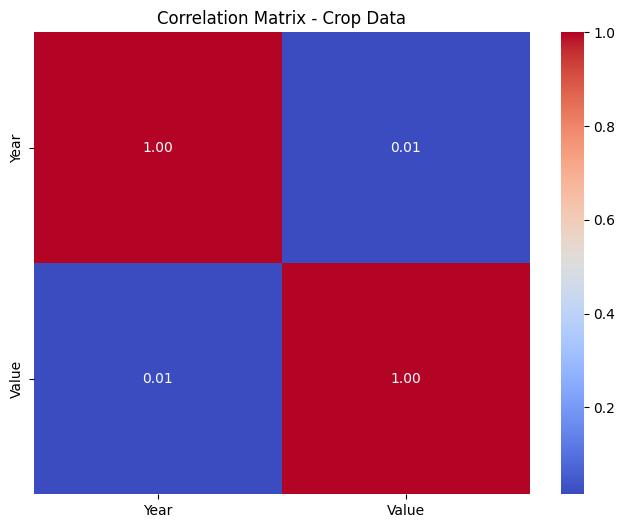

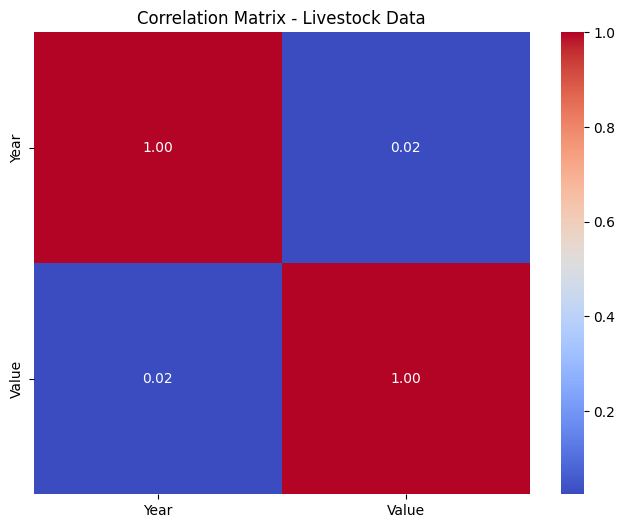

In [6]:
# Heatmap for correlation in crop data (numerical features only)
numeric_cols_crop = crop_df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols_crop.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Crop Data")
plt.show()

# Heatmap for correlation in livestock data (numerical features only)
numeric_cols_livestock = live_df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols_livestock.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Livestock Data")
plt.show()

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np


# Data cleaning
crop_df_cleaned = crop_df[crop_df['Value'].notnull() & (crop_df['Value'] > 0)]
live_df_cleaned = live_df[live_df['Value'].notnull() & (live_df['Value'] > 0)]

# Encode categorical column 'Item'
label_encoder_crop = LabelEncoder()
crop_df_cleaned['Item_encoded'] = label_encoder_crop.fit_transform(crop_df_cleaned['Item'])

# Prepare features and target
X_crop = crop_df_cleaned[['Year', 'Item_encoded', 'Value']]
y_crop = crop_df_cleaned['Value']

# Split data
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_train_crop, X_val_crop, y_train_crop, y_val_crop = train_test_split(X_train_crop, y_train_crop, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_crop_scaled = scaler.fit_transform(X_train_crop)
X_val_crop_scaled = scaler.transform(X_val_crop)
X_test_crop_scaled = scaler.transform(X_test_crop)

# Reshape for CNN
X_train_cnn = np.expand_dims(X_train_crop_scaled, axis=-1)
X_val_cnn = np.expand_dims(X_val_crop_scaled, axis=-1)
X_test_cnn = np.expand_dims(X_test_crop_scaled, axis=-1)



C:\Users\nehay\AppData\Local\Temp\ipykernel_21420\1828681470.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df_cleaned['Item_encoded'] = label_encoder_crop.fit_transform(crop_df_cleaned['Item'])


In [14]:
# Ensure reshaped input is compatible with CNN
X_train_cnn = X_train_crop_scaled.reshape(-1, X_train_crop_scaled.shape[1], 1, 1)
X_val_cnn = X_val_crop_scaled.reshape(-1, X_val_crop_scaled.shape[1], 1, 1)
X_test_cnn = X_test_crop_scaled.reshape(-1, X_test_crop_scaled.shape[1], 1, 1)

# Build CNN model with fixed dimensions
input_dim = (X_train_cnn.shape[1], X_train_cnn.shape[2], 1)  # Corrected input shape
model = Sequential([
    Input(shape=input_dim),
    Conv2D(32, (2, 2), activation='relu', padding='same'),  # Added padding='same' to prevent dimension reduction
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same' to handle small inputs
    Dropout(0.3),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_cnn, y_train_crop, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val_cnn, y_val_crop)
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_cnn, y_test_crop)
print(f"Test MAE: {test_mae:.2f}")



Epoch 1/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 205s 6ms/step - loss: 151586944843776.0000 - mae: 1679697.7500 - val_loss: 7257077055488.0000 - val_mae: 1016201.1875
Epoch 2/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 178s 5ms/step - loss: 10844966486016.0000 - mae: 947755.5000 - val_loss: 4757369913344.0000 - val_mae: 807043.0000
Epoch 3/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 151s 5ms/step - loss: 9229441171456.0000 - mae: 799275.1250 - val_loss: 3625921019904.0000 - val_mae: 589308.8125
Epoch 4/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 162s 5ms/step - loss: 8696198332416.0000 - mae: 653224.5000 - val_loss: 2536692776960.0000 - val_mae: 535285.5625
Epoch 5/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - loss: 7041336737792.0000 - mae: 583925.5000 - val_loss: 1638052265984.0000 - val_mae: 425401.2812
Epoch 6/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 211s 6ms/step - loss: 7097808322560.0000 - mae: 474058.5625 - val_loss: 920544542720.0000 - val_mae: 339261.2812
Epoch 7/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 368s

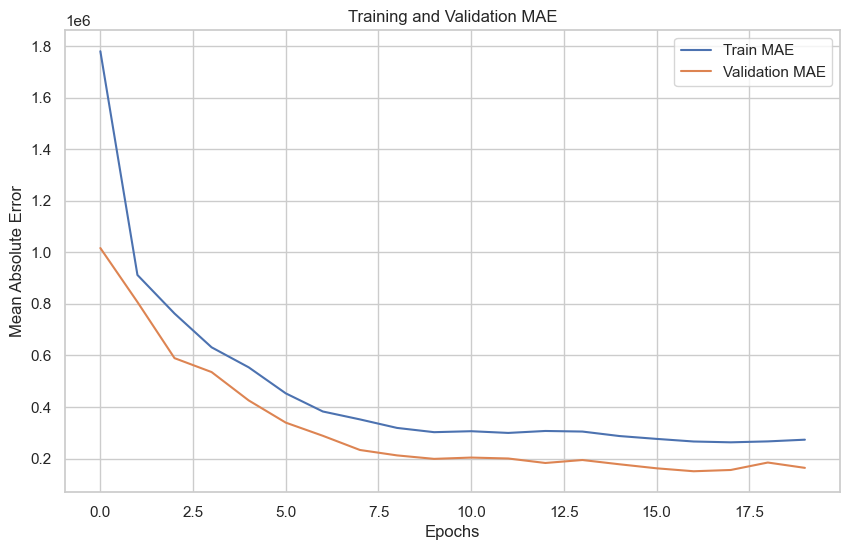

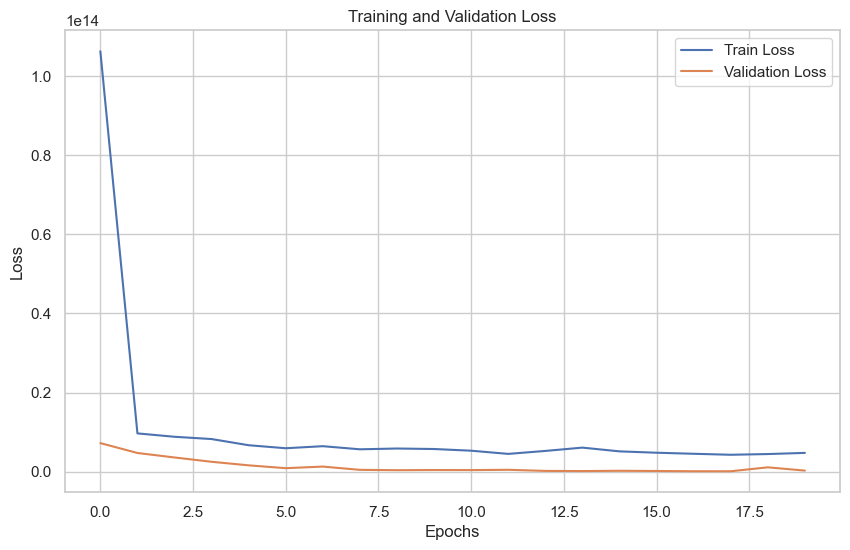

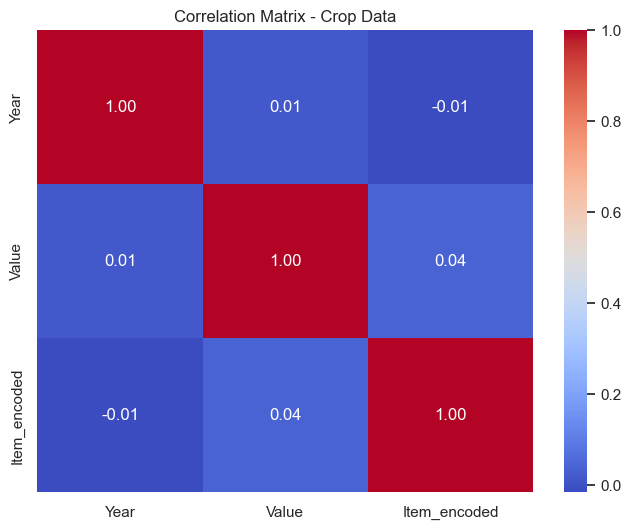

In [16]:
# Plot training and validation performance
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Heatmap for correlation matrix of crop data
numeric_cols_crop = crop_df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols_crop.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Crop Data")
plt.show()
